# Basic NLP concepts

## Data
* Data sources
* Raw text
* Annotation

## Cleaining, language identification

## Segmentation

* **Segmentation:** Divide bigger units into smaller ones
* In many cases text needs to be segmented into sentences and/or words
* Why?


* **Tokenization / word segmentation:** Segment text into individual tokens
* **Sentence splitting / sentence segmentation:** Segment text into individual sentences

Extremely bad customer service

Do not go to this salon, especially if you have to get your hair straightened. They did a very bad job with my hair and were extremely rude when I went back to ask them why it didn't work for my hair. Rude, insensitive, discourteous people!!!!!

(text source: https://github.com/UniversalDependencies/UD_English-EWT)

**Tokenized:**
Extremely bad customer service

Do not go to this salon , especially if you have to get your hair straightened . They did a very bad job with my hair and were extremely rude when I went back to ask them why it did n't work for my hair . Rude , insensitive , discourteous people !!!!!

**Sentence splitted:**
Extremely bad customer service

Do not go to this salon, especially if you have to get your hair straightened.

They did a very bad job with my hair and were extremely rude when I went back to ask them why it didn't work for my hair.

Rude, insensitive, discourteous people!!!!!

### Tokenization: HOW?

* **Naive method 1:** Split from whitespace characters

In [2]:
text="""Extremely bad customer service

Do not go to this salon, especially if you have to get your hair straightened. \
They did a very bad job with my hair and were extremely rude when I went back to \
ask them why it didn't work for my hair. Rude, insensitive, discourteous people!!!!!"""

tokenized_text = text.split() # split(): Return a list of the words in the string, using whitespace as the delimiter string.

for w in tokenized_text:
    print(w)

Extremely
bad
customer
service
Do
not
go
to
this
salon,
especially
if
you
have
to
get
your
hair
straightened.
They
did
a
very
bad
job
with
my
hair
and
were
extremely
rude
when
I
went
back
to
ask
them
why
it
didn't
work
for
my
hair.
Rude,
insensitive,
discourteous
people!!!!!


* **Naive method 2:** Split from whitespace characters, take into account punctuation
* Regular expressions!
    * Define search patters
    * Find this kind of pattern from raw text, or find-and-replace
* Find all punctuation characters, and replace with whitespace+punctiation character
    * *book.* --> *book .*
    * *people!!!!!* --> *people !!!!!*
    * How about clitics in English? [don't, can't, cannot?]
    * 2-(14-hydroxypentadecyl)-4-methyl-5-oxo-2,5-dihydrofuran-3-carboxylic acid ???
    * Usually it's not that important how exactly you do it, just be consistent!
        * consistent = always do it the same way
        * If you download two datasets which are already tokenized, the tokenization may differ and you need to be aware of it!

In [11]:
import re

tokenized = re.sub(r'([.,!?]+)', r' \1', text) # replace . , ! ? with whitespace+character(s), '+' means one or more
tokenized = re.sub(r"(n't)", r" \1", tokenized) # clitics

print(tokenized) # Note: this is still string, apply simple whitespace splitting to get a list of tokens

Extremely bad customer service

Do not go to this salon , especially if you have to get your hair straightened . They did a very bad job with my hair and were extremely rude when I went back to ask them why it did n't work for my hair . Rude , insensitive , discourteous people !!!!!


* **Naive method 2** works quite well for English, Finnish, Swedish...
    * Approx. 97-99% correct on clean text (TODO: source?)
    * Many existing tokenizers are just (a bunch of) regular expressions
    * Can be hundreds of different rules...


* How about other languages, does it work for all?

.

.

.

.

.

.

.

.

**Nope! Why not?**

.

.

.

.

.

.

.

* All languages do not use whitespace or punctuation, or the meaning of those may be different.
* Chinese, Thai, Vietnamese

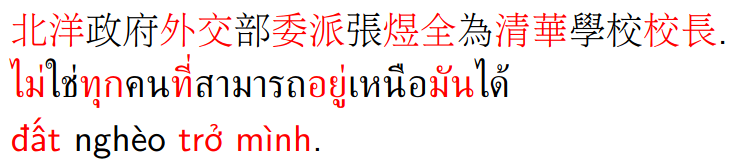

* **Naive algorithm:**
    1) Build a vocabulary for the language
    2) Start from the beginning of the text, and find the longest matching word
    3) Split the matching word and continue from the next remaining character
* *the table down there* --> *thetabledownthere* --> *theta bled own there*
    * Does not work well for English, but in Chinese words are usually 2-4 characters long, so the simple algorithm works better
    
**Tokenization: State-of-the-art**
* State-of-the-art = The best existing method currently known
* Machine learning
    * Collect raw (untokenized) text for the language you are interested in, and manually tokenize it.
        * (TODO: how much?)
    * Train a classifier
    * The trained classifier can be used to tokenize new text

#### Sentence splitting: HOW?

* **Naive method 1:** What kind of punctuation characters end the sentence?
    * yes: . ! ?
    * no: ,
* Define a list of sentence-final punctuation, and always split on those.

#### Word frequencies

* Stop words
* tf-idf

#### Stemming and lemmatization